#Paquetes necesarios

In [7]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

Primeras pruebas 

In [2]:
# Si la ruta de Tesseract no está en el PATH, ruta al ejecutable
pytesseract.pytesseract.tesseract_cmd = r'C:/Program Files/Tesseract-OCR/tesseract'

# Lenguajes disponibles
print(pytesseract.get_languages(config=''))

#Cargo imagen y ocnvierto a RGB
img = cv2.imread('toy.tif') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Aplica reconocedor a imagen cargada
print(pytesseract.image_to_string(img_rgb))

['eng', 'osd']
Hasta el infinito y mas alla



area= 6730.0
PLACA:  —— mQ

G

Gc 4999C)

24999 GJ

area= 12604.5
PLACA:  
area= 11078.5
area= 8183.0
PLACA:  ae



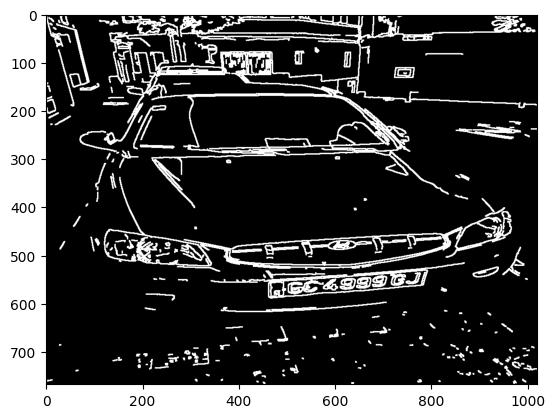

In [39]:
placa = []
image = cv2.imread('dataset_coches/1668451259657.jpg')
image = cv2.resize(image, (int(image.shape[0]/4), int(image.shape[1]/4)), cv2.INTER_NEAREST)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.blur(gray,(3,3))
canny = cv2.Canny(gray,150,200)
canny = cv2.dilate(canny,None,iterations=1)
plt.figure()
plt.imshow(canny, cmap='gray')
#_,cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#cv2.drawContours(image,cnts,-1,(0,255,0),1)

for c in cnts:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)
  
  if area>5000 and area < 15000:
    print('area=',area)
    cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    if aspect_ratio>4.7:
      placa = gray[y:y+h,x:x+w]
      text = pytesseract.image_to_string(placa,config='--psm 11')
      print('PLACA: ',text)
      cv2.imshow('PLACA',placa)
      cv2.moveWindow('PLACA',780,10)
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)
      cv2.putText(image,text,(x-20,y-10),1,2.2,(0,255,0),3)

while True:     
    cv2.imshow('Image',image)
    cv2.moveWindow('Image',45,10)
    tec = cv2.waitKey(40)
    if tec & tec == 27:  # Esc
        cv2.destroyAllWindows()
        break